### Read heavy quark data from files 
Using Julia

In [1]:
using Pickle

Qs = 2.0
results = ["wong", "kappa"]

function string_as_varname(s::AbstractString,v::Any)
    s=Symbol(s)
    return @eval (($s) = ($v))
end

for r in results
    file = string_as_varname("file_" * r, "mom_broad_" * r * ".pickle")
    data = string_as_varname("data_" * r, Pickle.npyload(file))
    string_as_varname("mom_broad_" * r,  data["mom_broad"])
    string_as_varname("tau_" * r,  data["tau"])
end

quarks = data_wong["quarks"]
pTs = string.(data_wong["pTs"])

4-element Vector{String}:
 "0"
 "2"
 "5"
 "10"

---
### Plots for article

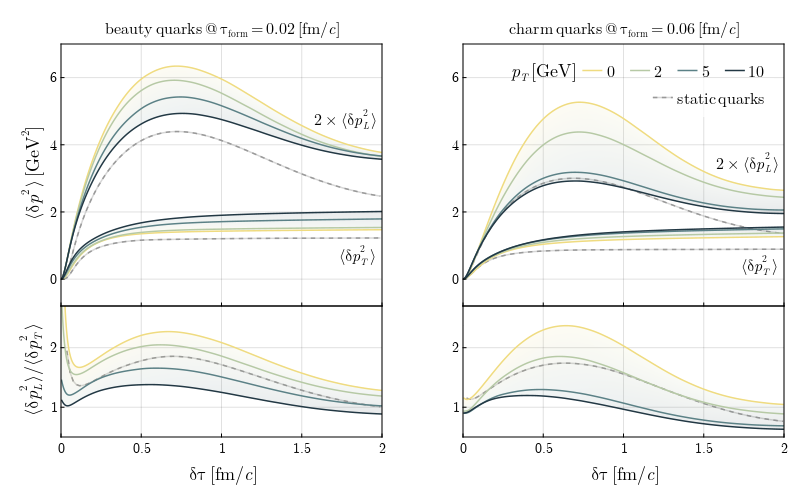

CairoScreen{Cairo.CairoSurfaceIOStream{UInt32}} with surface:
Cairo.CairoSurfaceIOStream{UInt32}(Ptr{Nothing} @0x000000000b5801e0, 600.0, 375.0, IOContext(IOStream(<file /home/dana/curraun/notebooks/mom_broad_wong_vs_kappa_final_v3.pdf>)))


In [3]:
using CairoMakie
using ColorSchemes

segmented_cmap = cgrad(:starrynight, 16, categorical = true)
colors = [segmented_cmap[14], segmented_cmap[10], segmented_cmap[6], segmented_cmap[2]]
linestyles = [:dash, :dashdot, :dot]
width_line=1.5

fig = Figure(resolution = (800, 500), font = "CMU Serif")
ylabels = [L"\langle\delta p^2\,\rangle\,\mathrm{[GeV^2]}", 
        L"\langle\delta p^2_L\,\rangle/\langle\delta p^2_T\,\rangle"]
titles = [[L"\mathrm{beauty\,quarks\,@\,}\tau_\mathrm{form}=0.02\,\mathrm{[fm/}c\mathrm{]}", 
        L"\mathrm{charm\,quarks\,@\,}\tau_\mathrm{form}=0.06\,\mathrm{[fm/}c\mathrm{]}"], ["", ""]]
axes = [[Axis(fig[i, j], 
        xlabel=L"\delta\tau\,\mathrm{[fm/}c\mathrm{]}", ylabel=ylabels[i],title=titles[i][j],
        xlabelsize = 18, ylabelsize= 18, xticklabelsize=14, yticklabelsize=14,
        xtickalign = 1, xticksize=4, ytickalign=1, yticksize=4) for j in 1:2] for i in 1:2]

# dimenstion of fundamental representation for SU(3)
DR = 3

# factor
factor = 2

i = 1
for iq in 1:2
    tag_kappa = quarks[iq]
    δτ_kappa = Float64.(tau_kappa[tag_kappa])
    mom_broad_L_kappa = mom_broad_kappa[tag_kappa][:, 3]/DR*factor
    lines!(axes[1][iq], δτ_kappa, mom_broad_L_kappa, linewidth = width_line, color=:grey60, linestyle=:dash)
    lines!(axes[1][iq], δτ_kappa, mom_broad_L_kappa, linewidth = width_line, color=(:grey60, 0.4))
    mom_broad_T_kappa = (mom_broad_kappa[tag_kappa][:, 1]+mom_broad_kappa[tag_kappa][:, 2])/DR
    lines!(axes[1][iq], δτ_kappa, mom_broad_T_kappa, linewidth = width_line, color=:grey60, linestyle=:dash)
    lines!(axes[1][iq], δτ_kappa, mom_broad_T_kappa, linewidth = width_line, color=(:grey60, 0.4))
    ratio = mom_broad_L_kappa./factor./mom_broad_T_kappa
    global kappa_dash = lines!(axes[2][iq], δτ_kappa, ratio, linewidth = width_line, color=:grey60, linestyle=:dash)
    global kappa = lines!(axes[2][iq], δτ_kappa, ratio, linewidth = width_line, color=(:grey60, 0.4))

    tag_low, tag_high = quarks[iq] * "_pT_" * pTs[1], quarks[iq] * "_pT_" * pTs[4]
    δτ_wong = Float64.(tau_wong[tag_low])
    mom_broad_L_low, mom_broad_L_high = mom_broad_wong[tag_low][:, 3]/DR*factor, mom_broad_wong[tag_high][:, 3]/DR*factor
    band!(axes[1][iq], δτ_wong, mom_broad_L_low, mom_broad_L_high; color = transpose(reverse(δτ_wong)), colormap = (:starrynight, 0.1))
    mom_broad_T_low, mom_broad_T_high = (mom_broad_wong[tag_low][:, 1] + mom_broad_wong[tag_low][:, 2])/DR, (mom_broad_wong[tag_high][:, 1] + mom_broad_wong[tag_high][:, 2])/DR
    band!(axes[1][iq], δτ_wong, mom_broad_T_low, mom_broad_T_high; color = transpose(reverse(δτ_wong)), colormap = (:starrynight, 0.1))
    ratio_low, ratio_high = mom_broad_L_low./factor./mom_broad_T_low, mom_broad_L_high./factor./mom_broad_T_high
    band!(axes[2][iq], δτ_wong, ratio_low, ratio_high; color = transpose(reverse(δτ_wong)), colormap = (:starrynight, 0.1))

    for ipT in 1:length(pTs)
        tag_wong = quarks[iq] * "_pT_" * pTs[ipT]
        δτ_wong = Float64.(tau_wong[tag_wong])

        mom_broad_L_wong = mom_broad_wong[tag_wong][:, 3]/DR*factor
        lines!(axes[1][iq], δτ_wong, mom_broad_L_wong, linewidth = width_line, color=colors[ipT])
        mom_broad_T_wong = (mom_broad_wong[tag_wong][:, 1] + mom_broad_wong[tag_wong][:, 2])/DR
        lines!(axes[1][iq], δτ_wong, mom_broad_T_wong, linewidth = width_line, color=colors[ipT])
        ratio = mom_broad_L_wong./factor./mom_broad_T_wong
        string_as_varname("wong_pT_"*string(ipT), lines!(axes[2][iq], δτ_wong, ratio, linewidth = width_line, color=colors[ipT]))
    end
end

for i in 1:2
        linkyaxes!(axes[i][1], axes[i][2])
        hideydecorations!(axes[i][2], grid = false, ticks = false, ticklabels = false)
        for j in 1:2
                xlims!(axes[i][j], 0, 2)
                axes[i][j].xticks = ([0, 0.5, 1, 1.5, 2], ["0", "0.5", "1", "1.5", "2"])
        end
end

for j in 1:2
        linkxaxes!(axes[1][j], axes[2][j])
        hidexdecorations!(axes[1][j], grid = false, ticks = false)
end

ylims!(axes[1][1], -0.8, 7)
ylims!(axes[1][2], -0.8, 7)
axes[1][1].yticks = ([0, 2, 4, 6], string.([0, 2, 4, 6]))
axes[1][2].yticks = ([0, 2, 4, 6], string.([0, 2, 4, 6]))

ylims!(axes[2][1], 0.5, 2.7)
axes[2][1].yticks = ([1, 2, 3], string.([1, 2, 3]))
axes[2][2].yticks = ([1, 2, 3], string.([1, 2, 3]))


rowsize!(fig.layout, 1, Relative(2/3))
rowsize!(fig.layout, 2, Relative(1/3))

colgap!(fig.layout, 70)
rowgap!(fig.layout, 0)

legend_wong_pT = [L"0", L"2", L"5", L"10"]
axislegend(axes[1][2], [wong_pT_1, wong_pT_2, wong_pT_3, wong_pT_4], legend_wong_pT, L"p_T\,\mathrm{[GeV]}", labelsize=16, 
        titleposition = :left, titlesize=18, 
        # position=:rt,
        position = (1,1.025), 
        orientation = :horizontal, bgcolor = (:white, 0), framecolor=(:grey80, 0))

legend_kappa = [L"\mathrm{static\,quarks}"]
axislegend(axes[1][2], [[kappa, kappa_dash]], legend_kappa, labelsize=16, position = (1,0.88), orientation = :vertical, bgcolor = (:white, 0.7), framecolor=(:grey80, 0))

# text!(axes[1][1], L"\mathrm{beauty\,quarks\,@\,}\tau_\mathrm{form}=0.02\,\mathrm{[fm/c]}", position = (0.1,7), textsize=16)
# text!(axes[1][2], L"\mathrm{charm\,quarks\,@\,}\tau_\mathrm{form}=0.06\,\mathrm{[fm/c]}", position = (0.1,7), textsize=16)

text!(axes[1][1], L"2\times\langle\delta p_L^2\,\rangle", position = (1.58,4.4), textsize=16)
text!(axes[1][1], L"\langle\delta p_T^2\,\rangle", position = (1.74,0.35), textsize=16)

text!(axes[1][2], L"2\times\langle\delta p_L^2\,\rangle", position = (1.58,3.1), textsize=16)
text!(axes[1][2], L"\langle\delta p_T^2\,\rangle", position = (1.74, 0.05), textsize=16)

display(fig)
# save("mom_broad_wong_vs_kappa_all.png", fig, px_per_unit = 5.0) 
save("mom_broad_wong_vs_kappa_final_v3.pdf", fig) 

In [5]:
results = ["wong_jets_px_dep", "wong_jets_mass_dep", "qhat"]

function string_as_varname(s::AbstractString,v::Any)
    s=Symbol(s)
    return @eval (($s) = ($v))
end

for r in results
    file = string_as_varname("file_" * r, "mom_broad_" * r * ".pickle")
    data = string_as_varname("data_" * r, Pickle.npyload(file))
    string_as_varname("mom_broad_" * r,  data["mom_broad"])
    string_as_varname("tau_" * r,  data["tau"])
end

pxs, mass = string.(data_wong_jets_px_dep["pxs"]), string.(data_wong_jets_px_dep["mass"])
masses, px = string.(data_wong_jets_mass_dep["masses"]), string.(data_wong_jets_mass_dep["px"])

(["5", "10", "25", "50"], "50")

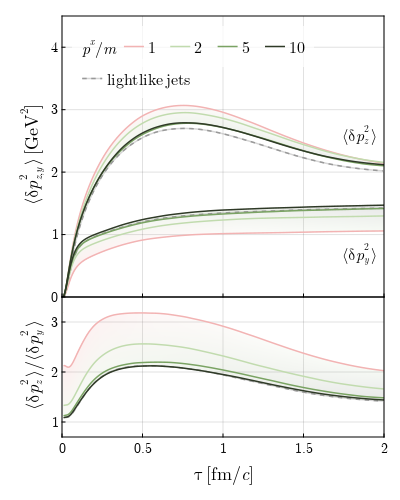

CairoScreen{Cairo.CairoSurfaceIOStream{UInt32}} with surface:
Cairo.CairoSurfaceIOStream{UInt32}(Ptr{Nothing} @0x000000000add7180, 300.0, 375.0, IOContext(IOStream(<file /home/dana/curraun/notebooks/mom_broad_wong_vs_qhat_final_v2.pdf>)))


In [7]:
using CairoMakie
using ColorSchemes

segmented_cmap = cgrad(:watermelon, 16, categorical = true)
colors = [segmented_cmap[14], segmented_cmap[10], segmented_cmap[6], segmented_cmap[2]]
linestyles = [:dash, :dashdot, :dot]
width_line=1.5

fig = Figure(resolution = (400, 500), font = "CMU Serif")
ylabels = [L"\langle\delta p_{z,y}^2\,\rangle\,\mathrm{[GeV^2]}", 
        L"\langle\delta p^2_z\,\rangle/\langle\delta p^2_y\,\rangle"]
axes = [Axis(fig[i, 1], 
        xlabel=L"\tau\,\mathrm{[fm/}c\mathrm{]}", ylabel=ylabels[i],
        xlabelsize = 18, ylabelsize= 18, xticklabelsize=14, yticklabelsize=14,
        xtickalign = 1, xticksize=4, ytickalign=1, yticksize=4, ) for i in 1:2]

# dimenstion of fundamental representation for SU(3)
DR = 3

δτ_qhat = Float64.(tau_qhat)
mom_broad_L_qhat = mom_broad_qhat[:, 3]/DR
lines!(axes[1], δτ_qhat, mom_broad_L_qhat, linewidth = width_line, color=:grey60, linestyle=:dash)
lines!(axes[1], δτ_qhat, mom_broad_L_qhat, linewidth = width_line, color=(:grey60, 0.4))
mom_broad_T_qhat = mom_broad_qhat[:, 2] /DR
lines!(axes[1], δτ_qhat, mom_broad_T_qhat, linewidth = width_line, color=:grey60, linestyle=:dash)
lines!(axes[1], δτ_qhat, mom_broad_T_qhat, linewidth = width_line, color=(:grey60, 0.4))
ratio = mom_broad_L_qhat./mom_broad_T_qhat
global qhat_dash = lines!(axes[2], δτ_qhat, ratio, linewidth = width_line, color=:grey60, linestyle=:dash)
global qhat = lines!(axes[2], δτ_qhat, ratio, linewidth = width_line, color=(:grey60, 0.4))


# px dependence 
tag_low, tag_high = "mass_" * mass * "_px_" * pxs[1], "mass_" * mass * "_px_" * pxs[length(pxs)]
δτ_wong_jets = Float64.(tau_wong_jets_px_dep[tag_low])
mom_broad_L_low, mom_broad_L_high = mom_broad_wong_jets_px_dep[tag_low][:, 3]/DR , mom_broad_wong_jets_px_dep[tag_high][:, 3]/DR
band!(axes[1], δτ_wong_jets, mom_broad_L_low, mom_broad_L_high; color = transpose(reverse(δτ_wong_jets)), colormap = (:watermelon, 0.1))
mom_broad_T_low, mom_broad_T_high = mom_broad_wong_jets_px_dep[tag_low][:, 2]/DR , mom_broad_wong_jets_px_dep[tag_high][:, 2]/DR
band!(axes[1], δτ_wong_jets, mom_broad_T_low, mom_broad_T_high; color = transpose(reverse(δτ_wong_jets)), colormap = (:watermelon, 0.1))
ratio_low, ratio_high = mom_broad_L_low./mom_broad_T_low, mom_broad_L_high./mom_broad_T_high
band!(axes[2], δτ_wong_jets, ratio_low, ratio_high; color = transpose(reverse(δτ_wong_jets)), colormap = (:watermelon, 0.1))

for ip in 1:length(pxs)
        tag_wong_jets = "mass_" * mass * "_px_" * pxs[ip]
        δτ_wong_jets = Float64.(tau_wong_jets_px_dep[tag_wong_jets])

        mom_broad_L_wong_jets = mom_broad_wong_jets_px_dep[tag_wong_jets][:, 3]/DR
        lines!(axes[1], δτ_wong_jets, mom_broad_L_wong_jets, linewidth = width_line, color=colors[ip])
        mom_broad_T_wong_jets = mom_broad_wong_jets_px_dep[tag_wong_jets][:, 2]/DR
        lines!(axes[1], δτ_wong_jets, mom_broad_T_wong_jets, linewidth = width_line, color=colors[ip])
        ratio = mom_broad_L_wong_jets./mom_broad_T_wong_jets
        string_as_varname("wong_px_"*string(ip), lines!(axes[2], δτ_wong_jets, ratio, linewidth = width_line, color=colors[ip]))
end


for i in 1:2
        xlims!(axes[i], 0, 2)
        axes[i].xticks = ([0, 0.5, 1, 1.5, 2], ["0", "0.5", "1", "1.5", "2"])
end

linkxaxes!(axes[1], axes[2])
hidexdecorations!(axes[1], ticks = false, grid = false)

ylims!(axes[1], 0, 4.5)
axes[1].yticks = ([0, 1, 2, 3, 4], string.([0, 1, 2, 3, 4]))
ylims!(axes[2], 0.7, 3.5)
axes[2].yticks = ([1, 2, 3], string.([1, 2, 3]))

rowsize!(fig.layout, 1, Relative(2/3))
rowsize!(fig.layout, 2, Relative(1/3))
rowgap!(fig.layout, 0)

# legend_wong_px = string.(floor.(Int,(parse.(Int64, pxs))./10))
legend_wong_px = [L"1", L"2", L"5", L"10"]
axislegend(axes[1], [wong_px_1, wong_px_2, wong_px_3, wong_px_4], legend_wong_px, L"p^x/m", labelsize=16, 
        titleposition = :left, titlesize=16, position = :lt, orientation = :horizontal, bgcolor = (:white, 0.7), framecolor=(:grey80, 0))

legend_qhat = [L"\mathrm{lightlike\,jets}"]
axislegend(axes[1], [[qhat, qhat_dash]], legend_qhat, labelsize=16, position = (0, 0.85), orientation = :vertical, bgcolor = (:white, 0.7), framecolor=(:grey80, 0))

text!(axes[1], L"\langle\delta p_z^2\,\rangle", position = (1.75,2.4), textsize=16)
text!(axes[1], L"\langle\delta p_y^2\,\rangle", position = (1.75, 0.5), textsize=16)

display(fig)
save("mom_broad_wong_vs_qhat_final_v2.pdf", fig) 